In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from string import ascii_letters
sns.set(style='white', context='notebook', palette='deep')

%matplotlib inline

from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.cross_validation import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/anaconda3/envs/PythonData/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
#Read in CSV
nba_df = pd.read_csv('draft_nba.csv')
nba_df

,draft_Player,draft_All_NBA,draft_All.Star,draft_Draft_Yr,draft_Pk,draft_Team,draft_College,draft_Yrs,draft_Games,draft_Minutes.Played,...,nba_ORB,nba_DRB,nba_TRB,nba_AST,nba_STL,nba_BLK,nba_TOV,nba_PF,nba_PTS,Traded
0,Speedy Claxton,0,0,2000,20,PHI,Hofstra University,7,334,8548,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Mark Karcher,0,0,2000,48,PHI,Temple University,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Stromile Swift,0,0,2000,2,MEM,Louisiana State University,9,547,10804,...,109.0,175.0,284.0,28.0,62.0,82.0,64.0,160.0,391.0,0.0
3,Jamaal Magloire,0,0,2000,19,NOH,University of Kentucky,12,680,14621,...,103.0,192.0,295.0,27.0,18.0,78.0,61.0,139.0,339.0,1.0
4,Erick Barkley,0,0,2000,28,POR,St. John's University,2,27,266,...,0.0,3.0,3.0,6.0,2.0,0.0,5.0,2.0,19.0,0.0
5,Jake Tsakalidis,0,0,2000,25,PHO,0,7,315,5005,...,83.0,159.0,242.0,19.0,10.0,55.0,66.0,137.0,256.0,0.0
6,Joel Przybilla,0,0,2000,9,HOU,University of Minnesota,13,592,11733,...,29.0,42.0,71.0,2.0,3.0,30.0,13.0,56.0,27.0,1.0
7,Eduardo Najera,0,0,2000,38,HOU,University of Oklahoma,12,619,11213,...,41.0,54.0,95.0,27.0,13.0,8.0,17.0,48.0,131.0,1.0
8,Mamadou N'Diaye,0,0,2000,26,DEN,Auburn University,5,69,858,...,1.0,1.0,2.0,0.0,0.0,0.0,0.0,3.0,4.0,1.0
9,Dan McClintock,0,0,2000,53,DEN,Northern Arizona University,1,6,58,...,10.0,7.0,17.0,1.0,0.0,2.0,3.0,11.0,18.0,0.0


In [3]:
clean_data1 = nba_df.dropna(subset = ['nba_VORP']).reset_index(drop=True)


In [4]:
# Only want the important draft information to predict what nba_VORP might be
important_data = ["nba_VORP",
            "draft_Pk",
            "draft_Games",
            "draft_Minutes.Played",
            "draft_PTS",
            "draft_TRB",
            "draft_AST",
            "draft_FG_Percentage",
            "draft_TP_Percentage",
            "draft_FT_Percentage",
            "draft_Minutes.per.Game",
            "draft_Points.per.Game",
            "draft_TRB.per.game",
            "draft_Assits.per.Game",
            "draft_Win.Share",
            "draft_WS_per_game",
            "draft_BPM",
            "draft_VORP",
            "draft_attend_college",
            ]

In [5]:
clean_data = clean_data1[important_data]
clean_data.head()

,nba_VORP,draft_Pk,draft_Games,draft_Minutes.Played,draft_PTS,draft_TRB,draft_AST,draft_FG_Percentage,draft_TP_Percentage,draft_FT_Percentage,draft_Minutes.per.Game,draft_Points.per.Game,draft_TRB.per.game,draft_Assits.per.Game,draft_Win.Share,draft_WS_per_game,draft_BPM,draft_VORP,draft_attend_college
0,0.2,2,547,10804,4582,2535,275,0.473,0.074,0.699,19.8,8.4,4.6,0.5,21.3,0.095,-1.9,0.2,1
1,-0.2,19,680,14621,4917,4408,386,0.480,0.000,0.639,21.5,7.2,6.5,0.6,27.7,0.091,-2.9,-3.3,1
2,0.0,28,27,266,77,21,40,0.356,0.267,0.900,9.9,2.9,0.8,1.5,0.2,0.027,-3.8,-0.1,1
3,-0.4,25,315,5005,1497,1238,101,0.490,0.000,0.657,15.9,4.8,3.9,0.3,9.9,0.095,-3.1,-1.3,0
4,-0.1,9,592,11733,2293,3665,256,0.552,0.000,0.557,19.8,3.9,6.2,0.4,23.0,0.094,-0.9,3.3,1


In [6]:
X = clean_data.iloc[:,1:]
y = clean_data.nba_VORP.values
print(X.shape, y.shape)

(648, 18) (648,)


In [7]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [8]:
from sklearn.cross_validation import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X ,y, test_size = 0.10,random_state =2)

In [9]:
reg.fit(X_train, y_train)
reg.score(X_test, y_test)

0.51794724931620695

In [10]:
#try to boost the score some
from sklearn import ensemble
clf = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 5, min_samples_split = 2,
          learning_rate = 0.1, loss = 'ls')

In [11]:
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.60335784238058809

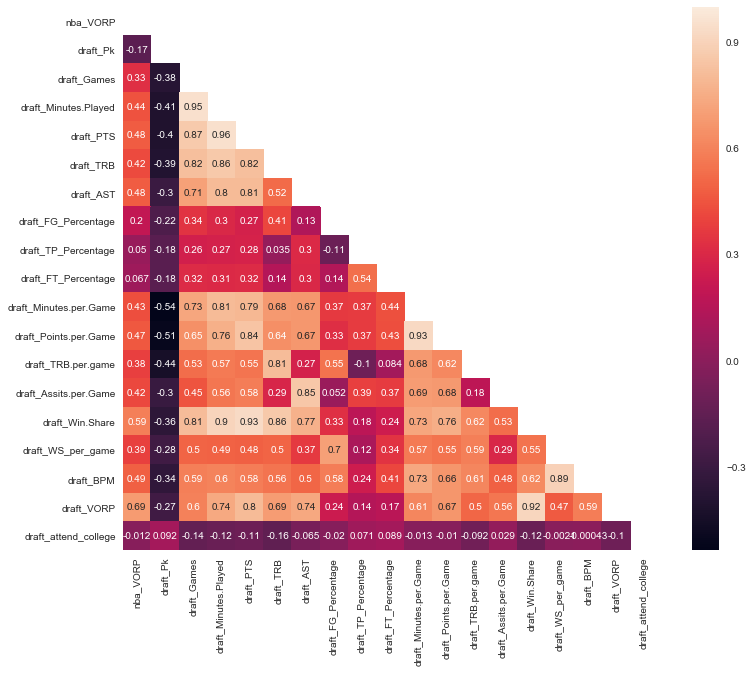

In [12]:
#Look at correlation heatmap to indicate correlation
def correlation_heat_map(clean_data):
    corrs1 = clean_data.corr()

    # Set fig size
    fig, ax = plt.subplots(figsize=(12,10))

    # Hide upper right triangle
    mask = np.zeros_like(corrs1, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Plot the heatmap with seaborn.
    ax = sns.heatmap(corrs1, mask=mask, annot=True)

    # Resize labels
    ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=10, rotation=90)
    ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=10, rotation=0)


    plt.show()
    
correlation_heat_map(clean_data)

In [13]:
#Bounce these numbers against the Stratified KFold method 
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

from sklearn.model_selection import StratifiedKFold
from sklearn import metrics, cross_validation
from sklearn.cross_validation import *
from sklearn.metrics import *
from sklearn.linear_model import LogisticRegression

In [14]:
skf = StratifiedKFold(clean_data["nba_VORP"], n_folds = 10)
fold_count = 1

corrs = pd.DataFrame()

# Correlations with "Roster"

for train, test in skf:
    
    # Log
    print(f"\n>>> Running fold {fold_count} <<<\n")
    
    # Training & testing dfs
    train_fold = clean_data.iloc[train]
    test_fold = clean_data.iloc[test]
    
    # Best features
    corr = train_fold.corr()["nba_VORP"][train_fold.corr()["nba_VORP"] < 1]
    corrs = corrs.append(corr)
    corrs = corrs.rename(index = {"nba_VORP": f"Fold {fold_count}"})
    print(corr)
    
    # Increment fold
    fold_count += 1


>>> Running fold 1 <<<

draft_Pk                 -0.103169
draft_Games               0.233393
draft_Minutes.Played      0.323814
draft_PTS                 0.355683
draft_TRB                 0.303760
draft_AST                 0.341980
draft_FG_Percentage       0.177078
draft_TP_Percentage       0.023942
draft_FT_Percentage       0.025080
draft_Minutes.per.Game    0.366844
draft_Points.per.Game     0.403005
draft_TRB.per.game        0.332259
draft_Assits.per.Game     0.334537
draft_Win.Share           0.434154
draft_WS_per_game         0.330790
draft_BPM                 0.415751
draft_VORP                0.550149
draft_attend_college      0.039943
Name: nba_VORP, dtype: float64

>>> Running fold 2 <<<

draft_Pk                 -0.160750
draft_Games               0.349320
draft_Minutes.Played      0.468490
draft_PTS                 0.495049
draft_TRB                 0.447635
draft_AST                 0.488998
draft_FG_Percentage       0.194161
draft_TP_Percentage       0.037734
draft_FT_

/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/cross_validation.py:553: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=10.
  % (min_labels, self.n_folds)), Warning)


In [15]:
corrs

,draft_AST,draft_Assits.per.Game,draft_BPM,draft_FG_Percentage,draft_FT_Percentage,draft_Games,draft_Minutes.Played,draft_Minutes.per.Game,draft_PTS,draft_Pk,draft_Points.per.Game,draft_TP_Percentage,draft_TRB,draft_TRB.per.game,draft_VORP,draft_WS_per_game,draft_Win.Share,draft_attend_college
Fold 1,0.341980,0.334537,0.415751,0.177078,0.025080,0.233393,0.323814,0.366844,0.355683,-0.103169,0.403005,0.023942,0.303760,0.332259,0.550149,0.330790,0.434154,0.039943
Fold 2,0.488998,0.409111,0.472634,0.194161,0.060925,0.349320,0.468490,0.417357,0.495049,-0.160750,0.445375,0.037734,0.447635,0.371935,0.698445,0.374426,0.611713,-0.005082
Fold 3,0.499423,0.422034,0.524218,0.206645,0.077211,0.355587,0.460718,0.433081,0.488027,-0.167251,0.461825,0.049293,0.430973,0.378601,0.690306,0.402868,0.602173,-0.033575
Fold 4,0.497221,0.433701,0.485225,0.200008,0.078922,0.340649,0.456348,0.444303,0.491018,-0.175321,0.480431,0.062827,0.428697,0.380324,0.701964,0.382234,0.603000,-0.017017
Fold 5,0.486913,0.433629,0.491064,0.201605,0.067212,0.331589,0.444388,0.436335,0.477181,-0.174630,0.469362,0.048211,0.424029,0.388403,0.695431,0.390706,0.593353,-0.015991
Fold 6,0.484770,0.428768,0.493908,0.202487,0.067904,0.335695,0.450289,0.443430,0.482501,-0.176251,0.475875,0.044974,0.429578,0.392770,0.693278,0.390687,0.597152,-0.016161
Fold 7,0.484359,0.426449,0.499070,0.203326,0.070174,0.341760,0.457882,0.452039,0.488470,-0.185652,0.480025,0.064302,0.431600,0.393590,0.692411,0.399441,0.597756,-0.003135
Fold 8,0.484825,0.437870,0.499066,0.213759,0.073101,0.334916,0.447753,0.446999,0.478999,-0.174921,0.476095,0.056499,0.425050,0.391905,0.692131,0.399695,0.595694,-0.018582
Fold 9,0.477479,0.419784,0.512376,0.216625,0.074804,0.335814,0.446895,0.441154,0.478563,-0.178361,0.473030,0.054041,0.424987,0.391575,0.688238,0.426217,0.592923,-0.019240
Fold 10,0.477017,0.417579,0.498520,0.201929,0.069594,0.333769,0.447083,0.446356,0.478203,-0.182169,0.470764,0.052904,0.423111,0.393520,0.689794,0.400317,0.592748,-0.014142


In [16]:
avg_corrs = pd.DataFrame(corrs.mean())
avg_corrs.columns = ["Avg corr"]
avg_corrs["Avg corr (Abs)"] = avg_corrs["Avg corr"].abs()
avg_corrs.sort_values(["Avg corr (Abs)"], ascending = False)

,Avg corr,Avg corr (Abs)
draft_VORP,0.679215,0.679215
draft_Win.Share,0.582067,0.582067
draft_BPM,0.489183,0.489183
draft_AST,0.472299,0.472299
draft_PTS,0.471369,0.471369
draft_Points.per.Game,0.463579,0.463579
draft_Minutes.Played,0.440366,0.440366
draft_Minutes.per.Game,0.432790,0.432790
draft_TRB,0.416942,0.416942
draft_Assits.per.Game,0.416346,0.416346


In [17]:
#virtually the same - I'll go with the heatmap for visualization purposes 
#because it also shows correlation among independent variables


In [18]:
sel_var = avg_corrs[avg_corrs["Avg corr (Abs)"] > .3].index.values.tolist()
sel_var

['draft_AST',
 'draft_Assits.per.Game',
 'draft_BPM',
 'draft_Games',
 'draft_Minutes.Played',
 'draft_Minutes.per.Game',
 'draft_PTS',
 'draft_Points.per.Game',
 'draft_TRB',
 'draft_TRB.per.game',
 'draft_VORP',
 'draft_WS_per_game',
 'draft_Win.Share']

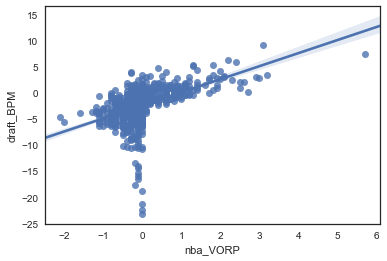

In [19]:
sns.regplot(clean_data1.nba_VORP, clean_data1['draft_BPM'])

plt.show()

In [20]:
y2 = clean_data.nba_VORP.values
X2 = clean_data[sel_var]
print("Shape:", X2.shape, y2.shape)

Shape: (648, 13) (648,)


In [21]:
from sklearn.linear_model import LinearRegression
reg2 = LinearRegression()

In [22]:
from sklearn.cross_validation import train_test_split

X2_train , X2_test , y2_train , y2_test = train_test_split(X2 ,y2, test_size = 0.10,random_state =2)

In [23]:
reg2.fit(X2_train, y2_train)
reg2.score(X2_test, y2_test)

0.52195600211583693

In [24]:
#try to boost the score some
from sklearn import ensemble
clf2 = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 5, min_samples_split = 2,
          learning_rate = 0.1, loss = 'ls')

In [25]:
clf2.fit(X2_train, y2_train)
clf2.score(X2_test, y2_test)

0.64851326447393087

In [26]:
#Let's try the values with low p-values
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [27]:
model = sm.OLS(y_train,X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                     35.98
Date:                Mon, 23 Apr 2018   Prob (F-statistic):           1.52e-81
Time:                        18:57:33   Log-Likelihood:                -376.12
No. Observations:                 583   AIC:                             788.2
Df Residuals:                     565   BIC:                             866.9
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
draft_Pk                   0.0017      0.001      1.149      0.251      -0.001       0.005
draft_Games               -0.0002      0.000     -0.571      0.568      -0.001       0.001
draft_Minutes.Played    7.568e-05   2.99e-05      2.531      0.012     1.7e-05       0.000
draft_PTS                 -0.0002   4.37e-05     -3.565      0.000      -0.000      -7e-05
draft_TRB                 -0.0002   6.46e-05     -2.763      0.006      -0.000   -5.16e-05
draft_AST                 -0.0001   9.49e-05     -1.377      0.169      -0.000    5.57e-05
draft_FG_Percentage        0.1437      0.325      0.443      0.658      -0.494       0.782
draft_TP_Percentage       -0.1743      0.179     -0.976      0.330      -0.525       0.176
draft_FT_Percentage       -0.2605      0.158     -1.645      0.101      -0.572       0.051
draft_Minutes.per.Game    -0.0324      0.014     -2.275      0.023      -0.060      -0.004
draft_Points.per.Game      0.0686      0.024      2.905      0.004       0.022       0.115
draft_TRB.per.game         0.0676      0.033      2.058      0.040       0.003       0.132
draft_Assits.per.Game      0.0662      0.049      1.351      0.177      -0.030       0.163
draft_Win.Share            0.0020      0.006      0.346      0.729      -0.009       0.013
draft_WS_per_game         -0.2591      0.800     -0.324      0.746      -1.831       1.313
draft_BPM                  0.0250      0.015      1.662      0.097      -0.005       0.055
draft_VORP                 0.0692      0.009      7.618      0.000       0.051       0.087
draft_attend_college       0.0214      0.059      0.366      0.714      -0.093       0.136
==============================================================================
Omnibus:                       43.814   Durbin-Watson:                   2.106
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              126.361
Skew:                           0.330   Prob(JB):                     3.64e-28
Kurtosis:                       5.183   Cond. No.                     5.09e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.09e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
#variables with low p-values = less than .05
significant_data = ["draft_Minutes.Played", "draft_PTS", "draft_TRB", "draft_Minutes.per.Game",
                    "draft_Points.per.Game","draft_TRB.per.game","draft_VORP"
                   ]

In [29]:
y3 = clean_data.nba_VORP.values
X3 = clean_data[significant_data]

In [30]:
from sklearn.linear_model import LinearRegression
reg3 = LinearRegression()

In [31]:
from sklearn.cross_validation import train_test_split

X3_train , X3_test , y3_train , y3_test = train_test_split(X3 ,y3, test_size = 0.10,random_state =2)

In [32]:
reg3.fit(X3_train, y3_train)
reg3.score(X3_test, y3_test)

0.46053498200917564

In [33]:
#try to boost the score some
from sklearn import ensemble
clf3 = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 5, min_samples_split = 2,
          learning_rate = 0.1, loss = 'ls')

In [34]:
clf3.fit(X3_train, y3_train)
clf3.score(X3_test, y3_test)

0.58747532440799688

In [35]:
#Print coefficients and intercept for important indep. variables
print("Coefficients:", reg2.coef_)
print("Intercept:", reg2.intercept_)

Coefficients: [ -1.25195841e-04   6.53719788e-02   4.12394316e-02  -5.70813180e-04
   9.88836711e-05  -4.86051526e-02  -1.77246301e-04   7.58504550e-02
  -1.91265187e-04   8.96664888e-02   6.51501577e-02  -7.77567234e-01
   3.70602491e-03]
Intercept: 0.153526815449


In [36]:
#Show which variables have greater weight in linear regression model
model_coef_df = pd.DataFrame(reg2.coef_, columns=["model_coef"])
model_coef_df.index = X.columns

ValueError: Length mismatch: Expected axis has 13 elements, new values have 18 elements

In [ ]:
model_coefs = pd.DataFrame({'variable': X.columns,
                           'coefficient': reg2.coef_,
                           'abs_coef': np.abs(reg2.coef_)})
model_coefs.sort_values('coefficient', inplace=True, ascending=False)
model_coefs

In [ ]:
#Predicted vs. Actual
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

In [ ]:
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics
scores = cross_val_score(reg2, X2_train, y2_train, cv =10)
scores

In [ ]:
predictions = cross_val_predict(reg2, X2_train, y2_train, cv =6)
sns.regplot(y2_train, predictions)

In [ ]:
accuracy = metrics.r2_score(y2_train, predictions)
print("Cross-Predicted Accuracy:", accuracy)

In [ ]:
#FINALLY NBA VORP PREDICTIONS
predicted_vorp = pd.DataFrame(clf2.predict(X))
predicted_vorp.columns = ['Predicted_VORP']
pred_feat = clean_data1[sel_var]
player = clean_data1['draft_Player']
actual_vorp = clean_data['nba_VORP']
vorp_diff = actual_vorp - predicted_vorp
prediction_df = pd.concat([player, pred_feat, actual_vorp, predicted_vorp], axis=1)
prediction_df["VORP_diff"] = (prediction_df["nba_VORP"]-prediction_df["Predicted_VORP"])
prediction_df["Abs_diff"] = np.abs(prediction_df['VORP_diff'])


In [ ]:
prediction_df.sort_values('Abs_diff', ascending=True)

In [ ]:
#need to round my data to one decimal point

In [ ]:
prediction_df.to_csv("VORP_Predictions.csv")


In [ ]:
import pickle
pickle.dump(reg2, open("Regression_Model.pkl", "wb"))

In [ ]:
#Test on New Data
new_draft = pd.read_csv("draft16_nba17_vorp.csv")
new_draft

In [ ]:
#drop null nba_VORP
clean_newdraft = new_draft.dropna(subset = ['nba_VORP']).reset_index(drop=True)
clean_newdraft

In [ ]:
X_new = clean_newdraft[sel_var]
y_new = clean_newdraft['nba_VORP']

In [ ]:
predicted2_vorp = pd.DataFrame(clf2.predict(X_new))
predicted2_vorp.columns = ['Predicted_VORP']
pred2_feat = clean_newdraft[sel_var]
player = clean_newdraft['draft_Player']
actual_vorp = clean_newdraft['nba_VORP']
vorp_diff = actual_vorp - predicted_vorp
prediction2_df = pd.concat([player, pred_feat, actual_vorp, predicted_vorp], axis=1)
prediction2_df["VORP_diff"] = (prediction_df["nba_VORP"]-prediction_df["Predicted_VORP"])
prediction2_df["Abs_diff"] = np.abs(prediction_df['VORP_diff'])
prediction2_df

In [ ]:
list(new_draft)


In [ ]:
#X_new = new_draft[sel_var]
#y_new = new_draft['nba_VORP']

In [ ]:
classifier = pickle.load(open("Regression_Model.pkl", "rb"))


In [ ]:
#Going with correlation data 
#Scale the data and predict
X = clean_data[sel_var]
y = clean_data["nba_VORP"]


In [ ]:
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics
X = clean_data[sel_var]
y = clean_data["nba_VORP"]
prediction = cross_val_predict(reg2, X, y, cv=6)
print ("Cross-validated scores:", prediction)

In [ ]:
plt.scatter(y, prediction)

In [ ]:
#How accurate is the model:
score = metrics.r2_score(y,predicted)
print ("Cross-Predicted Score:", score)